<a href="https://colab.research.google.com/github/Ms-Gichuhi/Hypothyroid-patients-prediction/blob/main/hypothyroid_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definining the question:

You have been tasked build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# The metric for success:

Build a model that makes the above prediction.

use at least 2 out of the 3 advanced models: Random forests, Ada boosted trees, and gradient boosted trees.

Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction

Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best.

# Experimental design

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

visualize the models you've created. Use any two features to build the models for this step.

In [2]:
#importing the libriries to use
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
#loading our dataset
df = pd.read_csv("hypothyroid.csv")
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [4]:
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.8,y,139,y,0.97,y,143,n,?


# EDA

In [5]:
df.shape

(3163, 26)

In [6]:
#checking datatypes for each column
df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
#dropping  the TBG and TBG measured column since it contains '?'
df.drop(['TBG','TBG_measured'], axis=1, inplace=True) 

In [9]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [10]:
#all the features are recorded as object datatypes,We classify and group the numerical features and the categorical 
#then change the datatypes.
cat_cols = ['status','sex','on_thyroxine',	'query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
            'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre',
            'TSH_measured', 'T3_measured', 'TT4_measured',	'T4U_measured',	'FTI_measured']

for col in cat_cols:
  df[col] = df[col].astype('category')           


In [11]:
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in num_cols:
  df[col] = df[col].apply(pd.to_numeric, errors='coerce')

df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
dtype: object

In [12]:
print(df.nunique())

status                         2
age                           92
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
dtype: int64


In [13]:
#checking for the missing values
df.isnull().sum()

status                         0
age                          446
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          468
T3_measured                    0
T3                           695
TT4_measured                   0
TT4                          249
T4U_measured                   0
T4U                          248
FTI_measured                   0
FTI                          247
dtype: int64

In [14]:
#checking for duplicated figures
print(df.duplicated().sum())

152


In [15]:
#the number of duplicates is relatively high and therefore we opt to drop them
#dropping the duplicates
df.drop_duplicates(inplace=True)
df.shape

(3011, 24)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

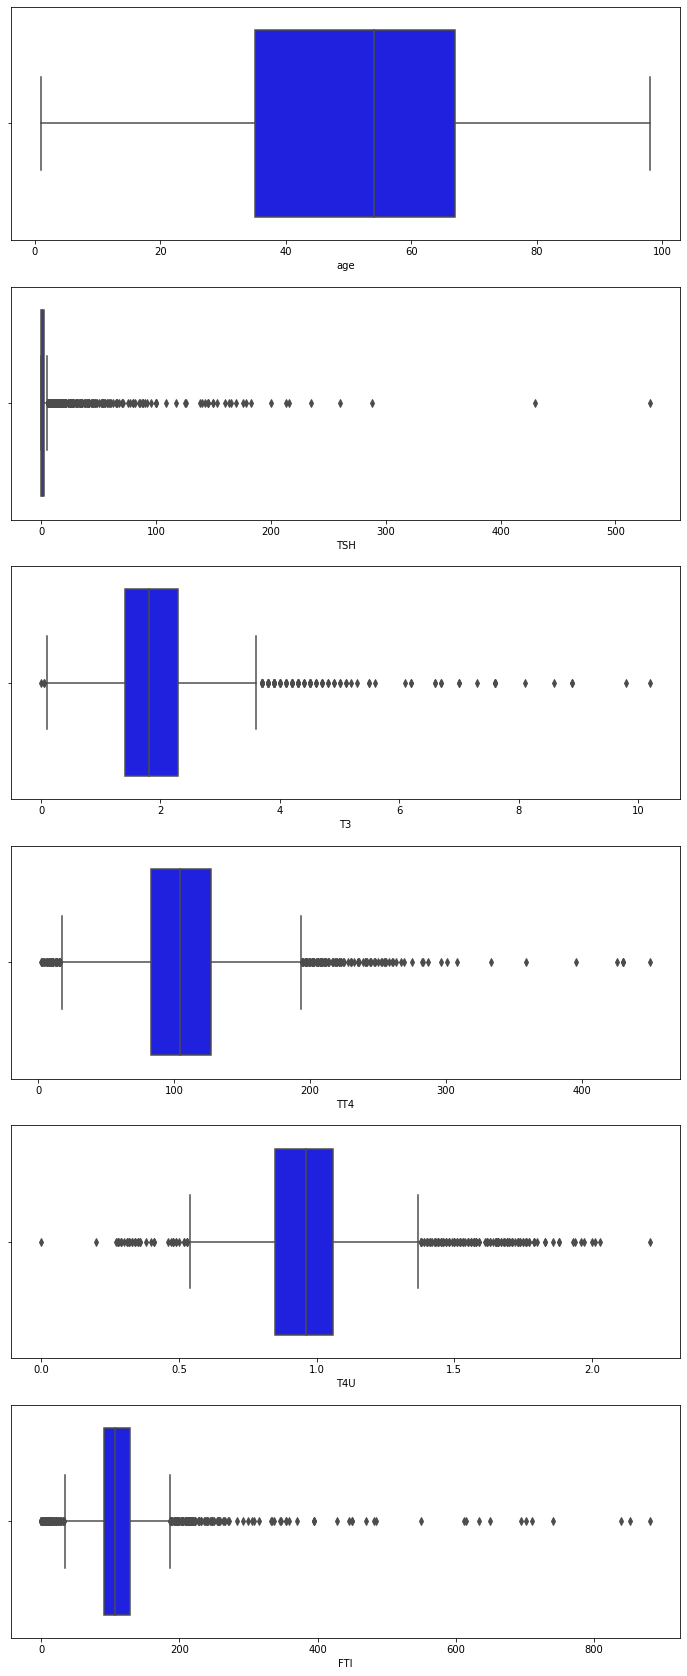

In [16]:
#checking for ouliers
import seaborn as sns
fig, ((ax1),(ax2), (ax3),(ax4),(ax5),(ax6)) = plt.subplots(6 ,figsize=(12, 30))
#fig.suptitle('Boxplots')
print('\n')
sns.boxplot(df['age'], ax=ax1, color='blue')
sns.boxplot(df['TSH'], ax=ax2, color='blue')
sns.boxplot(df['T3'], ax=ax3, color='blue')
sns.boxplot(df['TT4'], ax=ax4, color='blue')
sns.boxplot(df['T4U'], ax=ax5, color='blue')
sns.boxplot(df['FTI'], ax=ax6, color='blue')

plt.show()

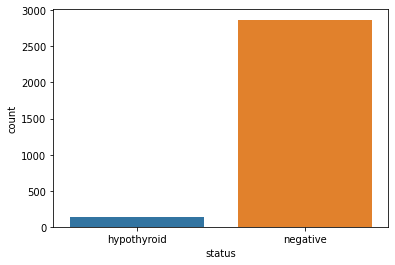

In [17]:
#univariate analysis

# Ploting the univariate summaries
sns.countplot(x='status', data=df)

from the above we can tell that mostr people tested negative withonly a few testing positive


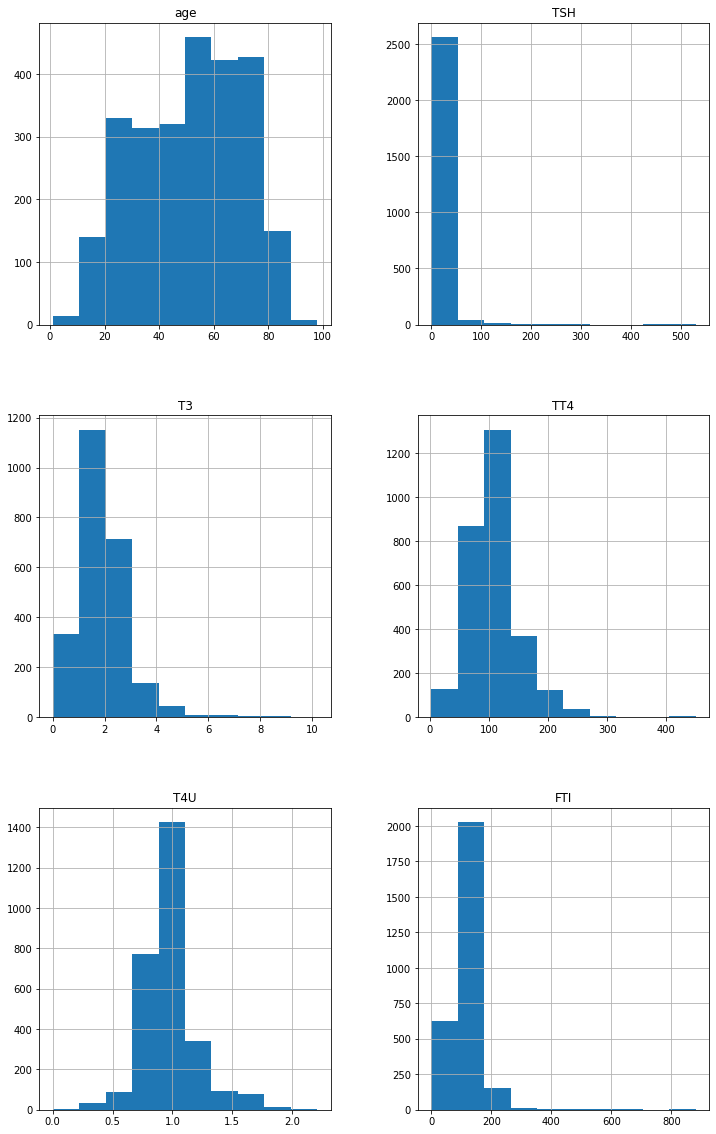

In [18]:
#plotting Histograms for each of the variables to see the distribution
from matplotlib import pyplot
colms = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
df.hist(figsize=(12,20))
pyplot.show()

From the visualizations above, FTI, T3,TSH,TBG, and TT4  are left skewed. 

T4U and Age have a normal distribution as per the visualization above

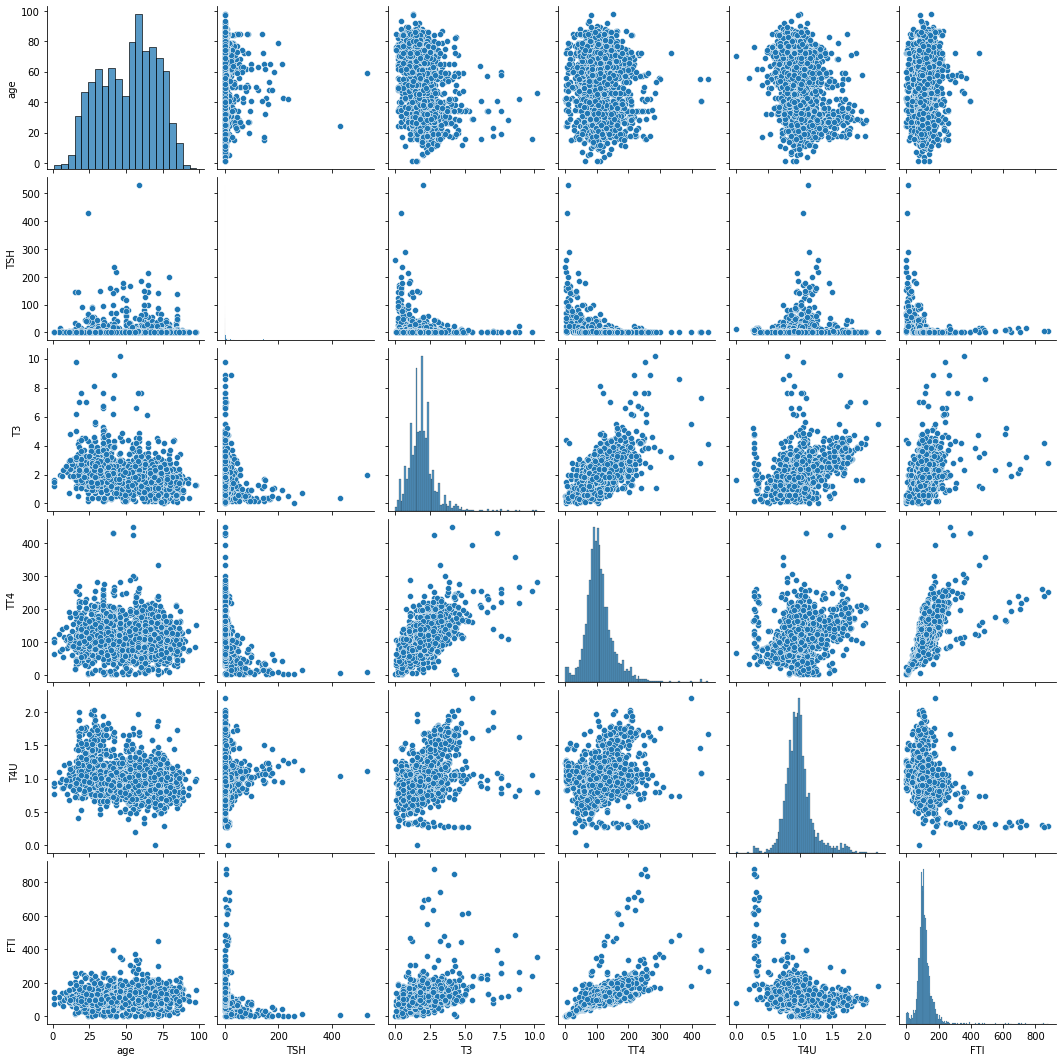

In [19]:
#bivariate analysis
# Scatter Plots of our Numeric Data
sns.pairplot(df)

In [20]:
#Convert the Categorical Variables into binary

cat_cols=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured']
# Import label encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for col in cat_cols:
  lbl_encoders[col]=LabelEncoder()
  df[col]= lbl_encoders[col].fit_transform(df[col])


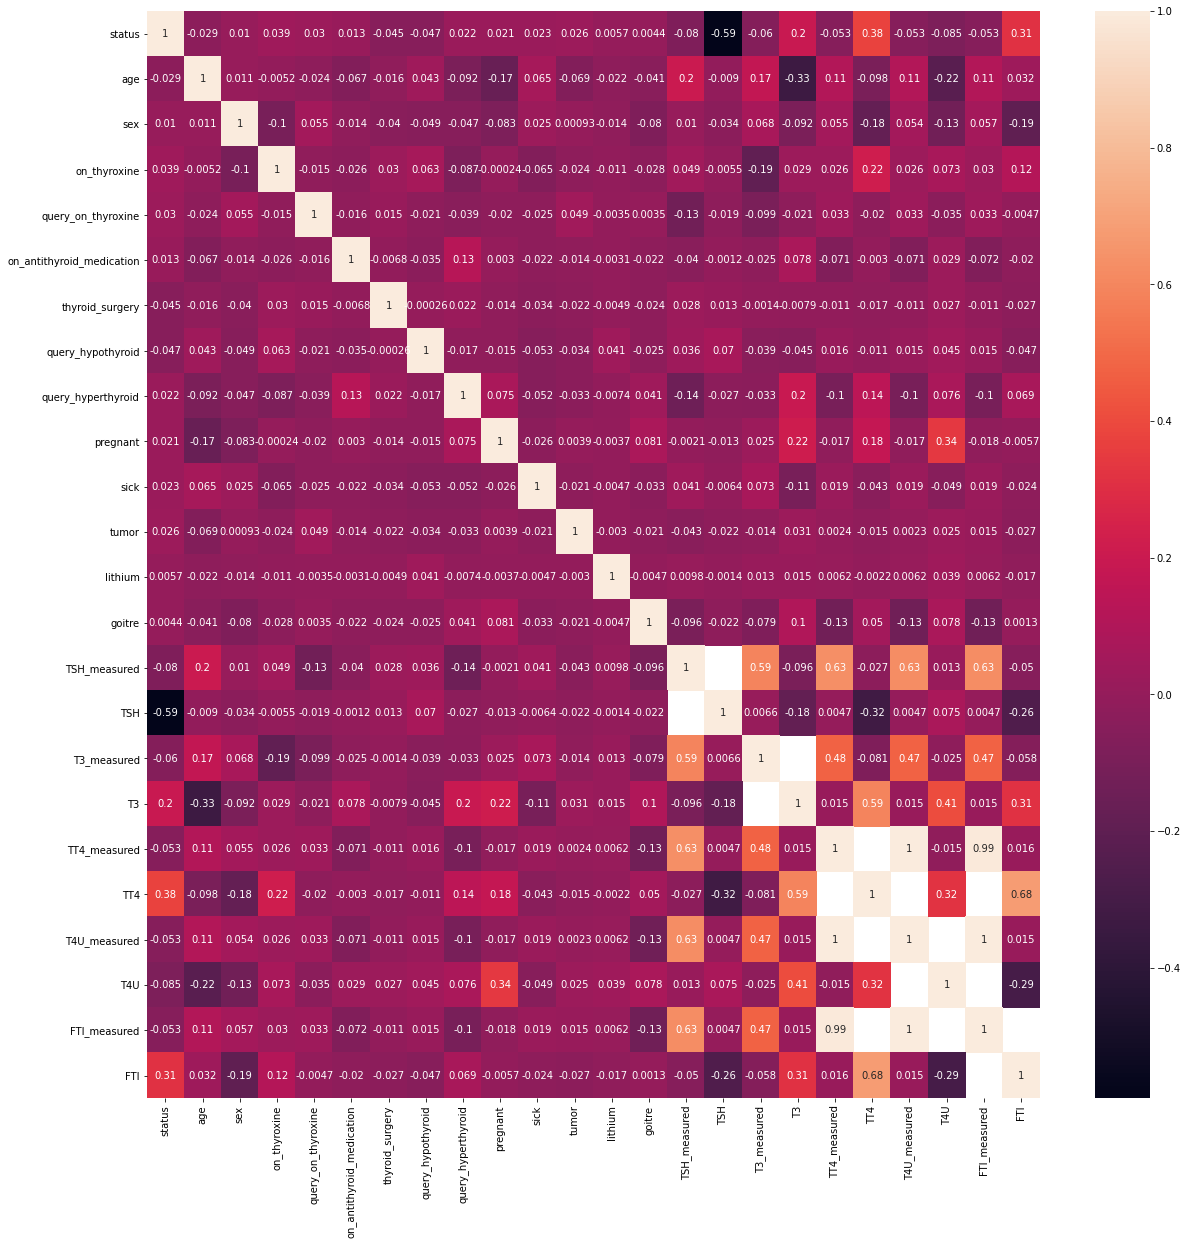

In [21]:
# A heatmap to show correlation

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True)

# Random forest

In [22]:
cat_cols = ['status','sex','on_thyroxine',	'query_on_thyroxine',	'on_antithyroid_medication',	'thyroid_surgery',
            'query_hypothyroid',	'query_hyperthyroid',	'pregnant',	'sick',	'tumor',	'lithium',	'goitre',
            'TSH_measured', 'T3_measured', 'TT4_measured',	'T4U_measured',	'FTI_measured']

for col in cat_cols:
  df[col] = df[col].astype('float')  

In [23]:
#Convert the Categorical Variables into binary

cat_cols=['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured']
# Import label encoder
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for col in cat_cols:
  lbl_encoders[col]=LabelEncoder()
  df[col]= lbl_encoders[col].fit_transform(df[col])

In [24]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72.0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,0,24.0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0
3,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0
4,0,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0


In [25]:
#Split data into train and test
features = df.columns.to_list()
features.remove('status')

X = df[features].values
y = df['status'].values

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)
X

array([[ 72.  ,   2.  ,   0.  , ...,   1.48,   1.  ,  10.  ],
       [ 15.  ,   1.  ,   1.  , ...,   1.13,   1.  ,  17.  ],
       [ 24.  ,   2.  ,   0.  , ...,   1.  ,   1.  ,   0.  ],
       ...,
       [ 77.  ,   2.  ,   0.  , ...,   0.68,   1.  , 104.  ],
       [ 74.  ,   1.  ,   0.  , ...,   0.48,   1.  , 137.  ],
       [ 56.  ,   1.  ,   1.  , ...,   0.97,   1.  , 143.  ]])

In [26]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [27]:
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=3)
forest = forest.fit(X_train, y_train)

#Predict based on the model we've trained
y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,603.000000,603.000000
mean,0.965174,0.965134
std,0.183491,0.164298
min,0.000000,0.056503
25%,1.000000,0.999167
50%,1.000000,0.999167
75%,1.000000,0.999167
max,1.000000,0.999167


In [28]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.012259543935511513
Mean Squared Error: 0.005558550743472517
Root Mean Squared Error: 0.07455568887397203


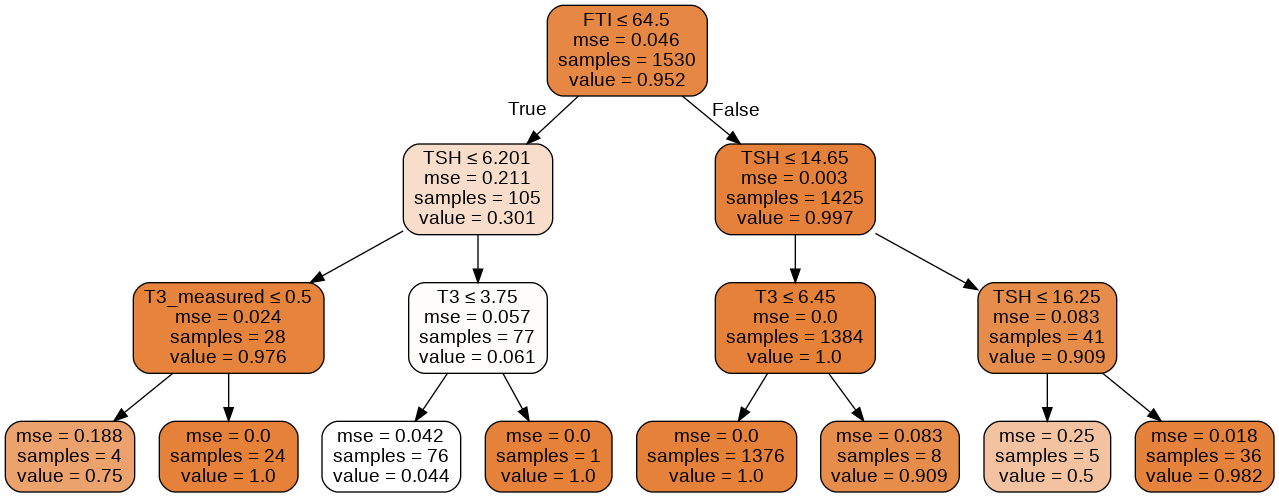

In [29]:
# visualizing tree number 55 from the forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[70]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_random_forest_70.png')
Image(graph.create_png())


In [30]:
importances = list(forest.estimators_[10].feature_importances_)

# list of tuples with variable and importance

feature_importances = [(feature, round(importance,2)) for feature, importance in zip(features, importances)]

print(feature_importances)
print()

feature_importances = sorted(feature_importances, key=(lambda x: x[1]))

[print('variable: {:20}  importance: {}'.format(*pair)) for pair in feature_importances]

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.27), ('T3_measured', 0.0), ('T3', 0.02), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.69)]

variable: sex                   importance: 0.0
variable: on_thyroxine          importance: 0.0
variable: query_on_thyroxine    importance: 0.0
variable: thyroid_surgery       importance: 0.0
variable: query_hypothyroid     importance: 0.0
variable: query_hyperthyroid    importance: 0.0
variable: pregnant              importance: 0.0
variable: sick                  importance: 0.0
variable: tumor                 importance: 0.0
variable: lithium               importance: 0.0
variable: goitre                importance: 0.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

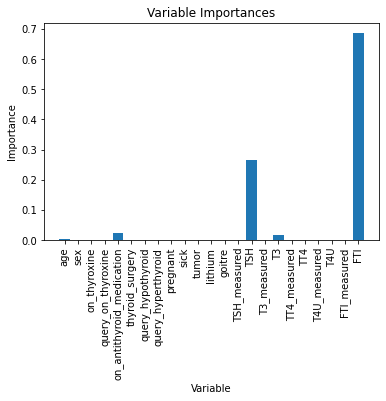

In [31]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
X_values = list(range(len(importances)))
# Make a bar chart
plt.bar(X_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(X_values, features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

After generating the feature importances, we notice the top three important features are on_antithyroid_medication, TSH and FTI. This shows that a patients thyroid condition can be assessed and determined by the results of this three features.

# Gradient boosted trees

In [32]:
#Split data into train and test
features = df.columns.to_list()
features.remove('status')

X = df[features].values
Y = df['status'].values

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=20)

In [33]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 200

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.7, max_depth=4)
gbr = gbr.fit(X_train, Y_train)

y_pred_gbr = gbr.predict(X_test)

In [35]:
#assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred_gbr))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred_gbr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_gbr)))

from sklearn.metrics import r2_score

print("R2 score is ",round(r2_score(Y_test, y_pred_gbr),2))

Mean Absolute Error: 0.017625111524688264
Mean Squared Error: 0.012141958951564988
Root Mean Squared Error: 0.11019055745192048
R2 score is  0.64


# Polymomial function

In [36]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
# Selecting the independent variables and the target variable
#we choose the top  two features with the greatest importance in predicting thyroidism
x = df[['FTI', 'TSH']]
y = df['status']
# 
# splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=20)
x

,FTI,TSH
0,10.0,30.0
1,17.0,145.0
2,0.0,0.0
3,6.0,430.0
4,44.0,7.3
...,...,...
3158,95.0,5.8
3159,98.0,0.8
3160,104.0,1.2
3161,137.0,1.3


In [38]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

In [39]:
# Building the model 

poly = SVC(kernel='poly',degree=3, gamma='scale')

# Training the model using the training set

poly.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# predicting the model

y_pred = poly.predict(x_test)

# cheking the accuracy of the model

print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

The accuracy of the model is  0.9811946902654868
[[ 27  10]
 [  7 860]]


In [41]:
#assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.018805309734513276
Mean Squared Error: 0.018805309734513276
Root Mean Squared Error: 0.13713245325054632


In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('hypothyroudism with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

The polynomial kernel has an accuracy of 98.11% . The model also misclassifies 17 values.

# Linear SVM

In [43]:
# splitting the data
x = df[['FTI', 'TSH']]
y = df['status']
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(x)

# splitting the data into training data and testing data. We will train using 70% of the data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=20)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)

# Fitting linear Kernel model

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [44]:
# Predicting our x test
y_predict = svclassifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9800884955752213


In [45]:
#assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.01991150442477876
Mean Squared Error: 0.01991150442477876
Root Mean Squared Error: 0.1411081302575396


In [46]:
# Confusion matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[ 24  13]
 [  5 862]]



The linear SVM shows a high accuracy of 98% which is almost similar to the polynomial one. However, the confusion matrix shows us that the model misclassified 18 predictions.

In [47]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

    

# Radial basis function (rbf)

In [48]:
# splitting the data

x = df[['FTI','T3']]
Y = df['status']

# standardizing the data

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

scaler = StandardScaler()

scaler.fit_transform(x)

# splitting the data into train and test sets

x_train,x_test,Y_train,Y_test = train_test_split(x,Y, test_size=0.3, random_state=20)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x_train)
x_train = imp.transform(x_train)
x_test = imp.transform(x_test)


In [49]:
# Fitting our rbf kernel
from sklearn.svm import SVC

rbf = SVC(kernel='rbf')
rbf.fit(x_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
# Making predictions on our x test
y_rbf_pred = rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(Y_test, y_rbf_pred))

Accuracy: 0.9789823008849557


In [51]:
#assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_rbf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_rbf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_rbf_pred)))

Mean Absolute Error: 0.02101769911504425
Mean Squared Error: 0.02101769911504425
Root Mean Squared Error: 0.14497482234872458


RBF has a lower accuracy that polynomial function and linear SVM at 97%.


# We pick the polynomial function as our best model.

In [52]:
#repeating the prediction with more features
#splitting the data
thyroid = df[['FTI','T4U','TSH','T3','age','on_antithyroid_medication','sex','on_thyroxine','thyroid_surgery']]
Y = df['status']
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(thyroid)
thyroid = imp.transform(thyroid)


# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(thyroid)
X = pca.transform(thyroid)
X.shape


(3011, 2)

In [53]:
#splitting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=20)

In [54]:
# Building the model 

poly = SVC(kernel='poly',degree=3)

# Training the model using the training set

poly.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
# predicting the model

y_pred = poly.predict(X_test)

# cheking the accuracy of the model

print('The accuracy of the model is ',metrics.accuracy_score(Y_test, y_pred))


The accuracy of the model is  0.9823008849557522


the accuracy of the model after adding more features is similar, so we conclude that our mo9del works best for polynomial function despite any adjustments.